# Proyecto Minería de Datos

**Objetivo General:** Crear un modelo con Machine Learning que pronostique tendencias, para relacionar productos que sean ideales para ventas cruzadas, en base a las transacciones de clientes.

**Dataset:** https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository

**Problema:** Para una empresa cualquiera, le es importante mejorar sus ventas o servicios de acuerdo a las necesidades del cliente. Los grandes negocios implementan procesos inteligentes acorde a las acciones de sus clientes, para lograr mejorar sus ingresos, algunos de estos procedimientos están basados en los conocimientos de marketing, Big Data, Smart Data, estadística. Sin embargo para lograr el objetivo de aumentar las ventas, es necesario tener una base de datos de las transacciones realizadas para el análisis de los datos, por tal motivo en este proyecto se enfoca en la creación de un modelo que pueda
predecir tendencias de agrupaciones de productos en base a las compras realizadas por diferentes clientes en una tienda de regalos del Reino Unido entre el 2009 y 2011.

**Tema:** Modelo de pronóstico de tendencias para ventas cruzadas de una tienda de regalos del
Reino Unido entre el 2009 a 2011

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import csv
from sklearn.metrics import v_measure_score
from sklearn import metrics

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [23]:
dataframe = pd.read_csv('Dataset40D_d.csv')
dataframe

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426
1,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015
2,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
3,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540
4,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896
...,...,...,...,...,...,...,...,...,...,...,...,...
318900,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134
318901,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
318902,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578
318903,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578


In [24]:
dataframe.describe()

,Price,Quantity,Customer ID,InvoiceDate,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3
count,318905.000000,318905.000000,3.189050e+05,3.189050e+05,3.189050e+05,318905.000000,3.189050e+05,3.189050e+05,318905.000000,3.189050e+05,3.189050e+05
mean,2.989402,12.033242,-1.109231e-16,1.490331e-14,7.247228e-15,0.001103,-2.255750e-17,4.228904e-15,0.010134,9.749869e-13,1.475977e-14
std,4.487527,69.651959,1.000000e+00,1.000000e+00,1.000000e+00,0.006966,6.965893e-03,1.000000e+00,0.015212,1.000000e+00,1.521195e-02
min,0.000000,1.000000,-2.018983e+00,-1.669865e+00,-1.894519e+00,0.000000,-1.103435e-03,-1.584053e-01,0.000000,-6.661581e-01,-1.013357e-02
25%,1.250000,2.000000,-8.475984e-01,-8.978100e-01,-7.771159e-01,0.000100,-1.003425e-03,-1.440482e-01,0.004237,-3.876082e-01,-5.896279e-03
50%,1.950000,4.000000,1.585757e-02,-2.179576e-02,-1.716132e-02,0.000300,-8.034045e-04,-1.153340e-01,0.006610,-2.316203e-01,-3.523397e-03
75%,3.750000,12.000000,8.654882e-01,8.737373e-01,6.316536e-01,0.001100,-3.324520e-06,-4.772568e-04,0.012712,1.694915e-01,2.578298e-03
max,295.000000,10000.000000,1.714490e+00,1.764603e+00,2.178597e+00,1.000000,9.988966e-01,1.433982e+02,1.000000,6.507161e+01,9.898664e-01


In [25]:
print(dataframe.groupby('StockCode').size())

StockCode
-1.894519    217
-1.893018      6
-1.891516      1
-1.890014     34
-1.888512     65
            ... 
 2.172589     10
 2.174091      7
 2.175593     25
 2.177095      2
 2.178597      7
Length: 2713, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


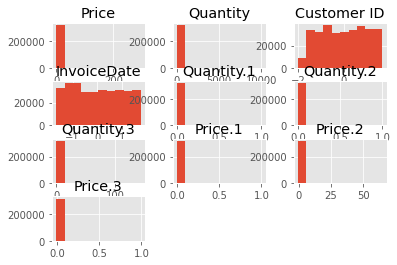

In [32]:
dataframe.drop(['StockCode'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


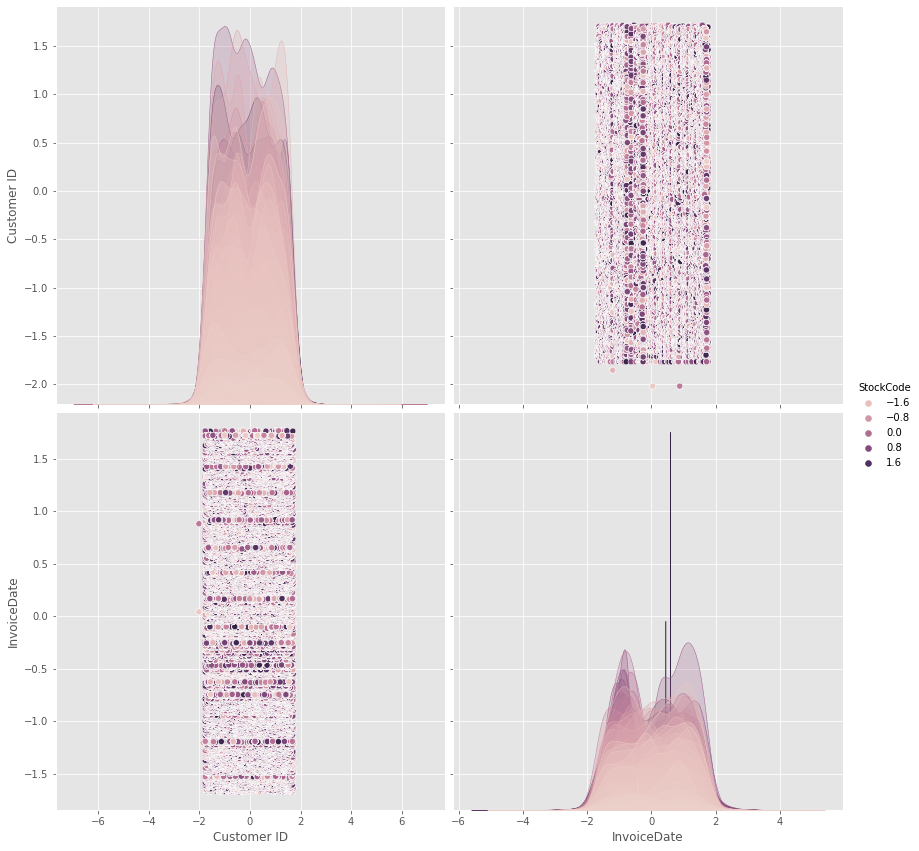

In [28]:
sb.pairplot(dataframe.dropna(), hue='StockCode',size=6,vars=["Customer ID","InvoiceDate"], kind='scatter')

In [29]:
X = np.array(dataframe[["Customer ID","InvoiceDate"]])
y = np.array(dataframe['StockCode'])
X.shape

(318905, 2)

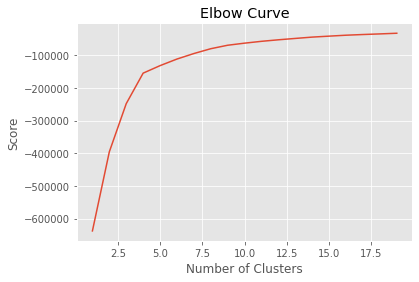

In [36]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [49]:
v_scores = [] 
N_Clusters = [2, 3, 4, 5, 6] 

In [50]:
kmeans2 = KMeans(n_clusters = 2) 
kmeans2.fit(X) 
labels2 = kmeans2.predict(X) 
v_scores.append(v_measure_score(y, labels2))

kmeans3 = KMeans(n_clusters = 3) 
kmeans3.fit(X) 
labels3 = kmeans3.predict(X) 
v_scores.append(v_measure_score(y, labels3))

kmeans4 = KMeans(n_clusters = 4) 
kmeans4.fit(X) 
labels4 = kmeans4.predict(X) 
v_scores.append(v_measure_score(y, labels4))

kmeans5 = KMeans(n_clusters = 5) 
kmeans5.fit(X) 
labels5 = kmeans5.predict(X) 
v_scores.append(v_measure_score(y, labels5))

kmeans6 = KMeans(n_clusters = 6) 
kmeans6.fit(X) 
labels6 = kmeans6.predict(X) 
v_scores.append(v_measure_score(y, labels6))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/p

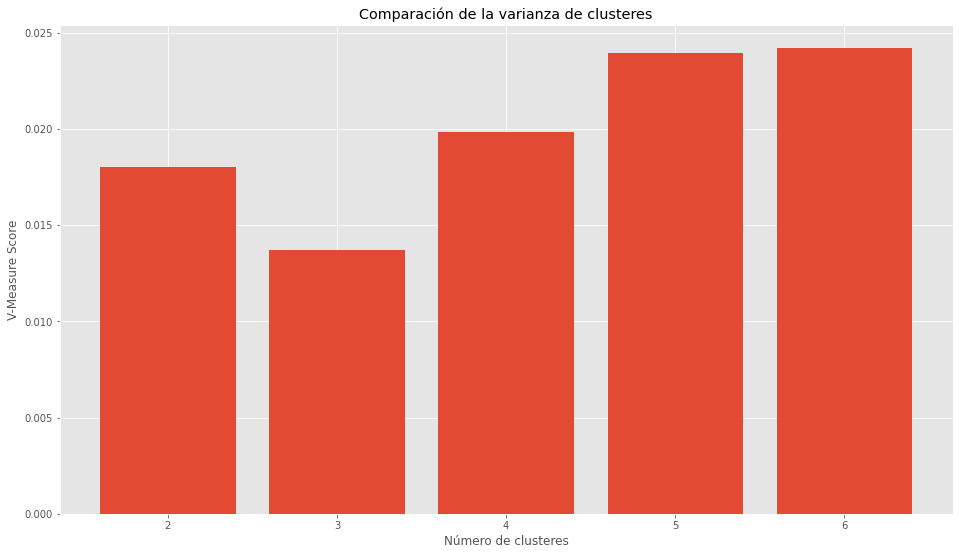

In [51]:
plt.bar(N_Clusters, v_scores) 
plt.xlabel('Número de clusteres') 
plt.ylabel('V-Measure Score') 
plt.title('Comparación de la varianza de clusteres') 
plt.show() 

In [39]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.91436779  0.89403698]
 [ 0.81541007 -0.85362196]
 [ 0.84605273  0.89306243]
 [-0.90625473 -0.84600744]]


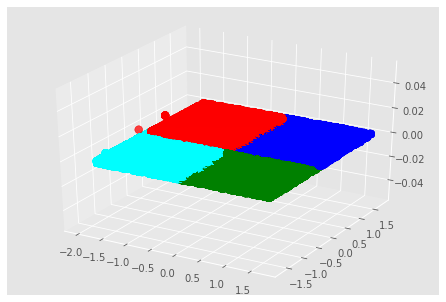

In [41]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

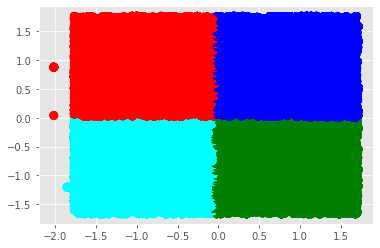

In [42]:
# Getting the values and plotting it
f1 = dataframe['Customer ID'].values
f2 = dataframe['InvoiceDate'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [43]:
copy =  pd.DataFrame()
copy['Description']=dataframe['Description'].values
copy['StockCode']=dataframe['StockCode'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,75012
1,green,86488
2,blue,80456
3,cyan,76949


In [44]:
#grup near centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([146182, 295913, 146514, 297026])

In [45]:
users=dataframe['Description'].values
for row in closest:
    print(users[row])

POTTERING IN THE SHED METAL SIGN
T-LIGHT GLASS FLUTED ANTIQUE
VICTORIAN SEWING BOX LARGE
BOX OF 9 PEBBLE CANDLES


In [46]:
X_new = np.array([[-0.216031,0.42268]])

In [ ]:
new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


In [47]:
dataframe['KMeans_Clusters'] = kmeans.labels_
dataframe

,Price,Quantity,Customer ID,InvoiceDate,Description,StockCode,Quantity.1,Quantity.2,Quantity.3,Price.1,Price.2,Price.3,KMeans_Clusters
0,6.95,12,-1.554577,-0.643216,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.899246,0.0011,-0.000003,-0.000477,0.023559,0.882579,0.013426,3
1,2.10,48,-1.554577,-0.643216,"RECORD FRAME 7"" SINGLE SIZE",-0.201893,0.0047,0.003597,0.516378,0.007119,-0.198194,-0.003015,3
2,1.25,24,-1.554577,-0.643216,STRAWBERRY CERAMIC TRINKET BOX,-1.148082,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,3
3,1.65,24,-1.554577,-0.643216,PINK DOUGHNUT TRINKET POT,-0.167350,0.0023,0.001197,0.171808,0.005593,-0.298472,-0.004540,3
4,1.25,24,-1.554577,-0.643216,SAVE THE PLANET MUG,-0.367101,0.0023,0.001197,0.171808,0.004237,-0.387608,-0.005896,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318900,2.95,2,1.238773,-0.251354,FELTCRAFT DOLL ROSIE,0.121012,0.0001,-0.001003,-0.144048,0.010000,-0.008780,-0.000134,1
318901,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS LOLA DOLL,0.798363,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,1
318902,3.75,1,1.238773,-0.251354,FELTCRAFT PRINCESS OLIVIA DOLL,0.799865,0.0000,-0.001103,-0.158405,0.012712,0.169492,0.002578,1
318903,3.75,2,1.238773,-0.251354,PINK FLORAL FELTCRAFT SHOULDER BAG,-1.451463,0.0001,-0.001003,-0.144048,0.012712,0.169492,0.002578,1


For n_clusters = 2 The average silhouette_score is : 0.36000553588216166
For n_clusters = 3 The average silhouette_score is : 0.38493148859022835
For n_clusters = 4 The average silhouette_score is : 0.41727212307119477
For n_clusters = 5 The average silhouette_score is : 0.3985348469081939
For n_clusters = 6 The average silhouette_score is : 0.3598806003077686


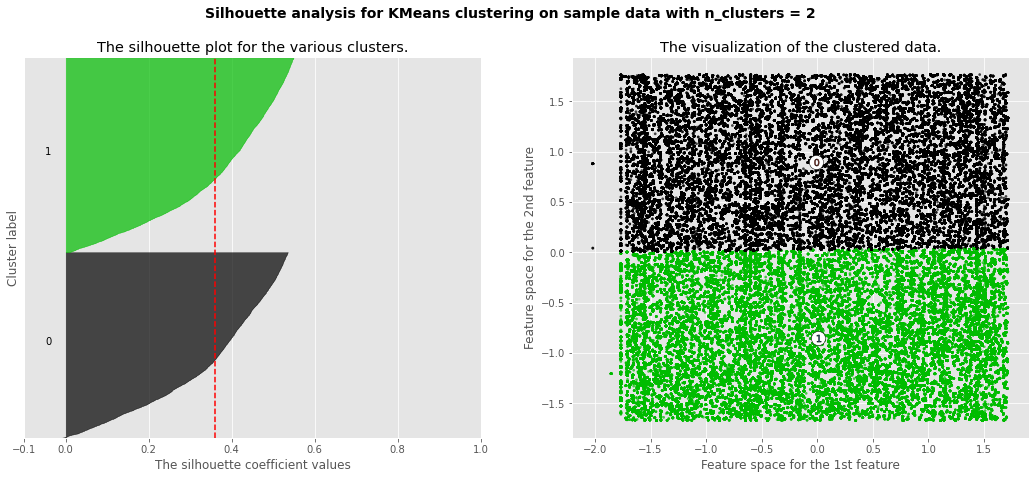

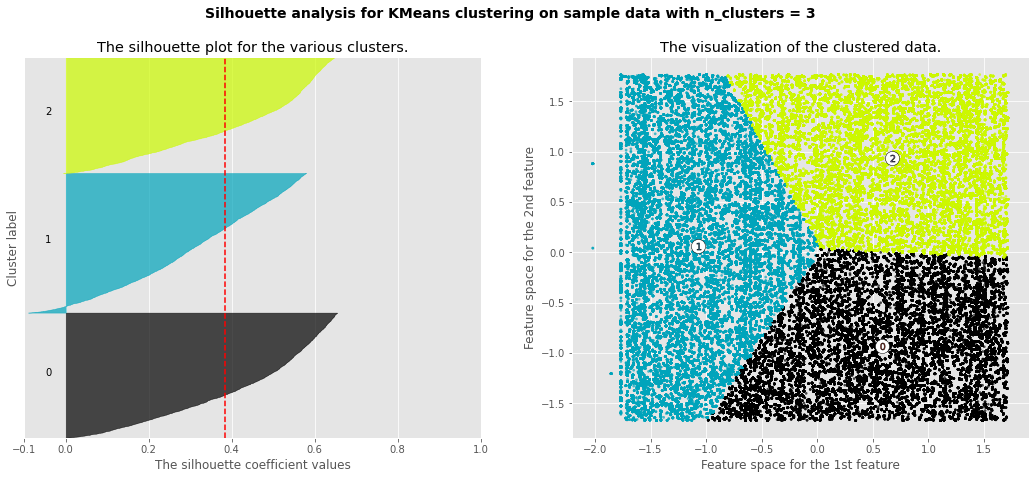

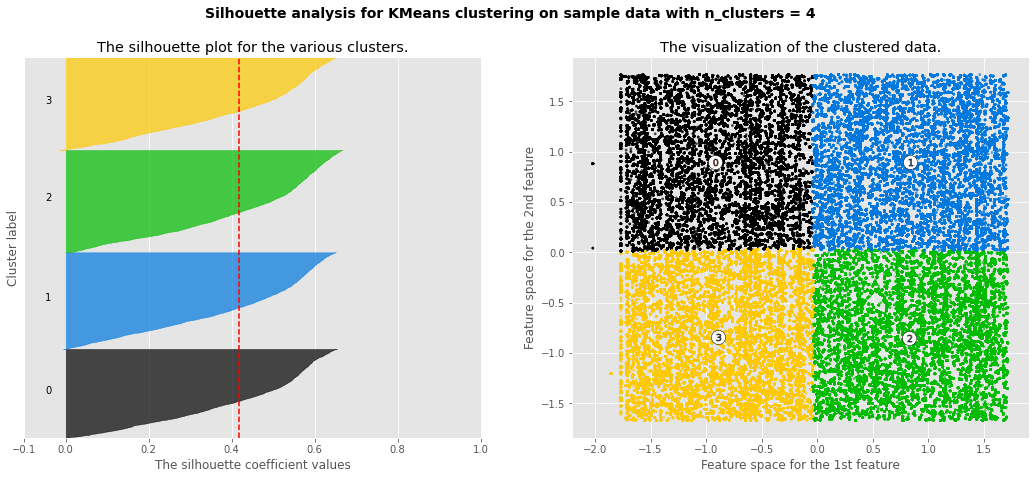

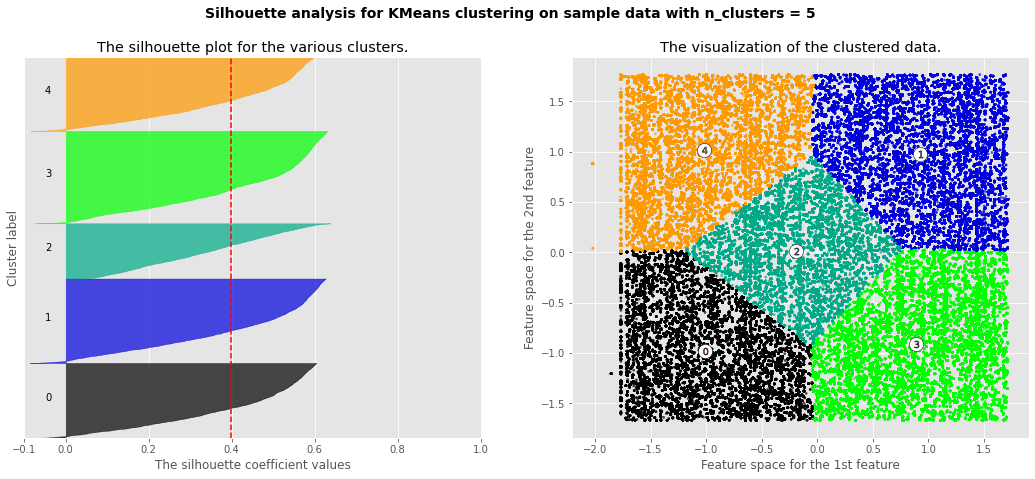

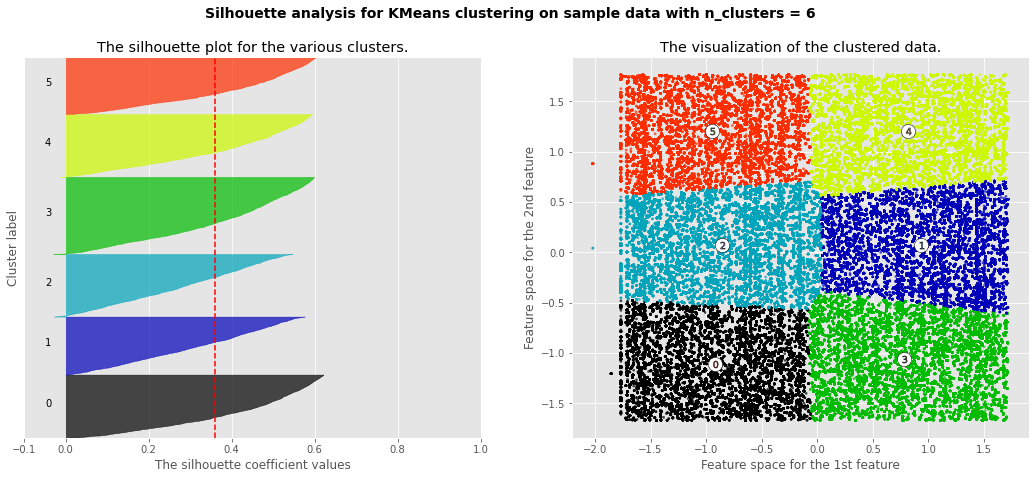

In [56]:

range_n_clusters = N_Clusters

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()